In [1]:
import os
from glob import glob
import numpy as np
import dask
import xarray as xr
import xrft
import cartopy.crs as ccrs
from cmocean import cm

from matplotlib import pyplot as plt
%matplotlib inline

from mitequinox.utils import *

/home1/datahome/xyu/.miniconda3/envs/equinox/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home1/datahome/xyu/.miniconda3/envs/equinox/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home1/datahome/xyu/.miniconda3/envs/equinox/lib/python3.6/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


In [2]:
from dask_jobqueue import PBSCluster
local_dir = os.getenv('TMPDIR')
cluster = PBSCluster(local_directory=local_dir)
#print(cluster.job_script())
w = cluster.start_workers(14)

/home1/datahome/xyu/.miniconda3/envs/equinox/lib/python3.6/site-packages/distributed/utils.py:128: RuntimeWarning: Couldn't detect a suitable IP address for reaching '8.8.8.8', defaulting to '127.0.0.1': [Errno 101] Network is unreachable
  % (host, default, e), RuntimeWarning)


In [3]:
# get dask handles and check dask server status
from dask.distributed import Client
client = Client(cluster)

In [4]:
client

Client Scheduler: tcp://10.148.1.25:54472 Dashboard: http://10.148.1.25:8787/status,Cluster Workers: 28 Cores: 112 Memory: 1400.00 GB


In [5]:
llc_dir = '/home1/scratch/xyu/mit_spec/zavg_UV/LLC1080/constant_window/'
ds_llc_cycl = xr.open_zarr(llc_dir+'E_cycl_all_openocean.zarr')
ds_llc_anti = xr.open_zarr(llc_dir+'E_anti_all_openocean.zarr')

E_llc_cycl = ds_llc_cycl.E_cycl_all
E_llc_anti = ds_llc_anti.E_anti_all

In [6]:
drifter_dir = '/home1/datawork/xyu/Drifters/'
ds = xr.open_zarr(drifter_dir+'mit_spec/E_drifter_globalmean.zarr')
print(ds)
E_drifter_anti = ds.E_drifter_anti
E_drifter_cycl = ds.E_drifter_cycl

<xarray.Dataset>
Dimensions:            (freq_time: 1439)
Coordinates:
  * freq_time          (freq_time) float64 -0.0 0.01667 0.03333 0.05 0.06667 ...
    freq_time_spacing  float64 ...
Data variables:
    E_drifter_anti     (freq_time) float64 dask.array<shape=(1439,), chunksize=(1439,)>
    E_drifter_cycl     (freq_time) float64 dask.array<shape=(1439,), chunksize=(1439,)>


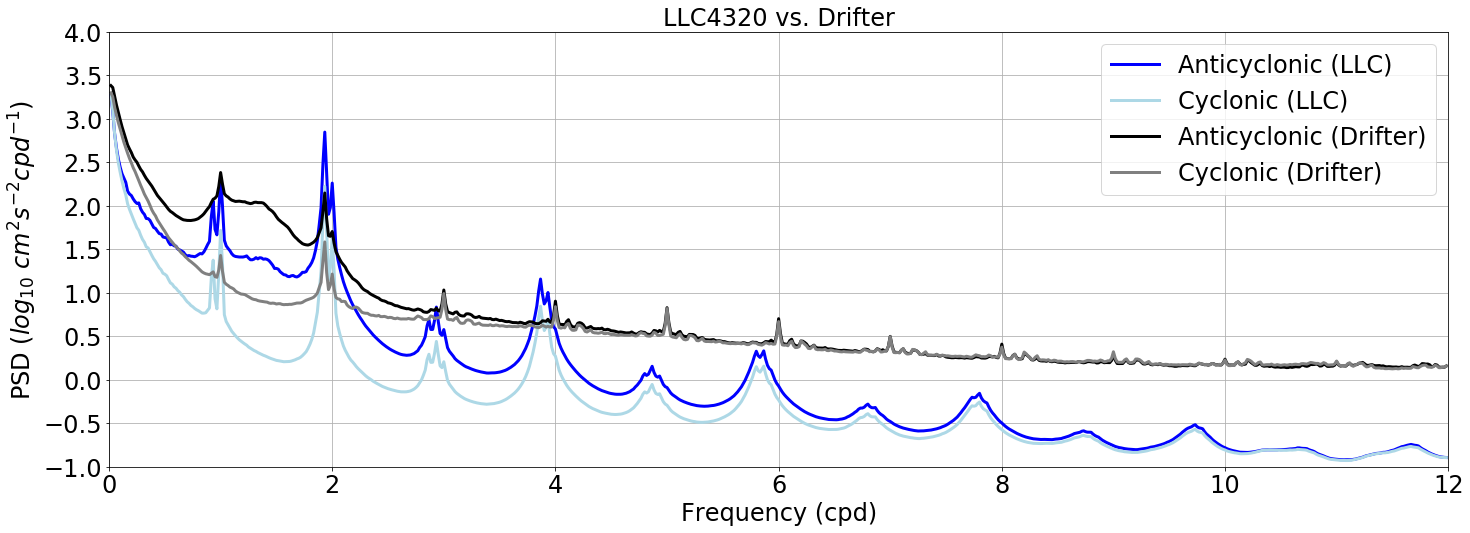

In [7]:
fig, ax = plt.subplots(figsize=(24,8))

labels = ['Anticyclonic (LLC)', 'Cyclonic (LLC)', 'Anticyclonic (Drifter)', 'Cyclonic (Drifter)']

# llc
(np.log10(E_llc_anti).where(E_llc_anti.freq_time>0)).plot(ax=ax,color='blue', label=labels[0], linewidth=3)
(np.log10(E_llc_cycl).where(E_llc_cycl.freq_time>0)).plot(ax=ax,color='lightblue', label=labels[1], linewidth=3)
# drifter
np.log10(E_drifter_anti).plot(ax=ax, linewidth=3, color='black', label=labels[2])
np.log10(E_drifter_cycl).plot(ax=ax, linewidth=3, color='grey', label=labels[3])

ax.legend(); ax.grid()
ax.set_ylim([-1.,4])
ax.set_yticks([-1.,-0.5, 0., 0.5, 1., 1.5, 2., 2.5, 3., 3.5,4.])
ax.set_xlim([0.,12.])

#ax.set_xticks([0., 1., 2., 3., 4., 5., 6., 7., 8., 9., 10., 11., 12.])
ax.legend(prop={'size': 24})
ax.set_ylabel('PSD ($log_{10}\ cm^2 s^{-2} cpd^{-1})$',fontsize=24)
ax.set_xlabel('Frequency (cpd)',fontsize=24)
ax.tick_params(labelsize=24)
ax.set_title('LLC4320 vs. Drifter',fontsize=24)

plt.savefig('/home1/datahome/xyu/equinox_working/sandbox/Figures/Rotary_spectra_globally_averaged_comparison.png')

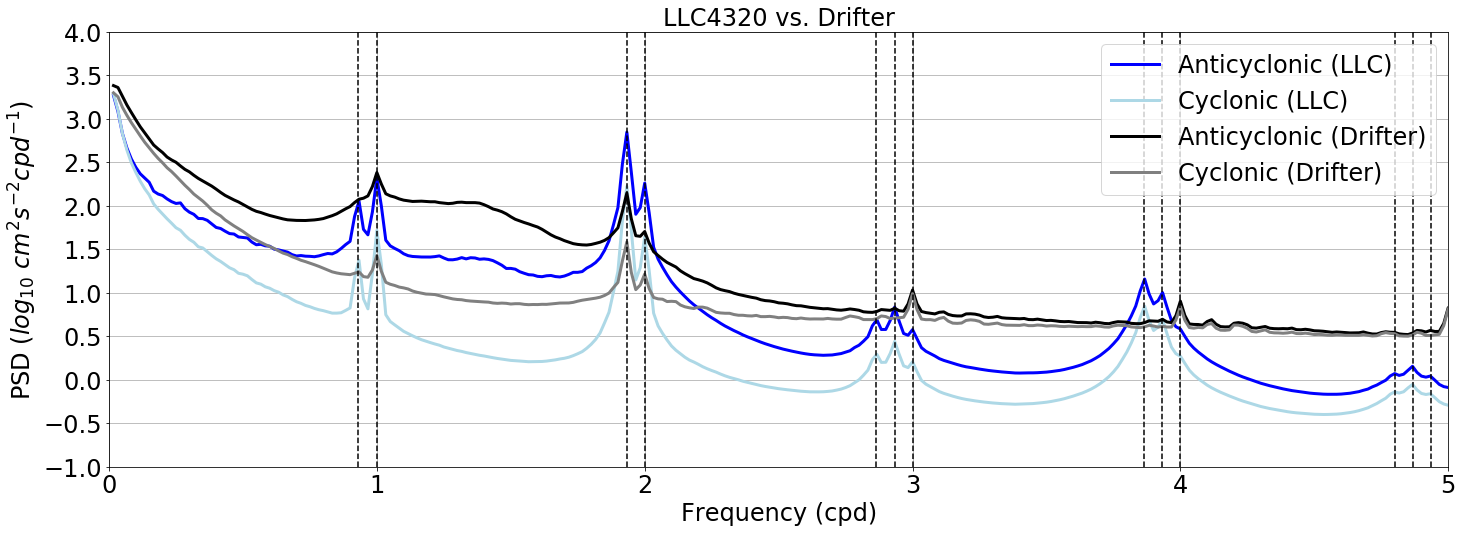

In [10]:
fig, ax = plt.subplots(figsize=(24,8))

labels = ['Anticyclonic (LLC)', 'Cyclonic (LLC)', 'Anticyclonic (Drifter)', 'Cyclonic (Drifter)']

# llc
(np.log10(E_llc_anti).where(E_llc_anti.freq_time>0)).plot(ax=ax,color='blue', label=labels[0], linewidth=3)
(np.log10(E_llc_cycl).where(E_llc_cycl.freq_time>0)).plot(ax=ax,color='lightblue', label=labels[1], linewidth=3)
# drifter
np.log10(E_drifter_anti).plot(ax=ax, linewidth=3, color='black', label=labels[2])
np.log10(E_drifter_cycl).plot(ax=ax, linewidth=3, color='grey', label=labels[3])

ax.legend(); ax.grid()
ax.set_ylim([-1.,4])
ax.set_yticks([-1.,-0.5, 0., 0.5, 1., 1.5, 2., 2.5, 3., 3.5,4.])
ax.set_xlim([0.,5.])
#ax.set_xticks([0., 1., 2., 3., 4., 5.])
ax.legend(prop={'size': 24})
ax.set_ylabel('PSD ($log_{10}\ cm^2 s^{-2} cpd^{-1})$',fontsize=24)
ax.set_xlabel('Frequency (cpd)',fontsize=24)
ax.tick_params(labelsize=24)
ax.set_title('LLC4320 vs. Drifter',fontsize=24)



# Diurnal frequencies
ax.plot([24/25.81933871,24/25.81933871],[-1,1e6],'k--') # O1
ax.plot([1,1],[-1,1e6],'k--') # S1

# Semi-diurnal frequencies
ax.plot([1.93227,1.93227],[-1,1e6],'k--') # M2
ax.plot([2,2],[-1,1e6],'k--') # S2

# 3
ax.plot([2.86181,2.86181],[-1,1e6],'k--') # MO3
ax.plot([2.93501,2.93501],[-1,1e6],'k--') # MK3
ax.plot([3.00274,3.00274],[-1,1e6],'k--') # SK3

# 4
ax.plot([3.86455,3.86455],[-1,1e6],'k--') # M4
ax.plot([3.93227,3.93227],[-1,1e6],'k--') # MS4
ax.plot([4,4],[-1,1e6],'k--') # S4

# 5
ax.plot([4.79956,4.79956],[-1,1e6],'k--') # 3MP5
ax.plot([4.86729,4.86729],[-1,1e6],'k--') # 2MK5
ax.plot([4.93501,4.93501],[-1,1e6],'k--') # MSK5


plt.savefig('/home1/datahome/xyu/equinox_working/sandbox/Figures/Rotary_spectra_globally_averaged_comparison_1_5.png')

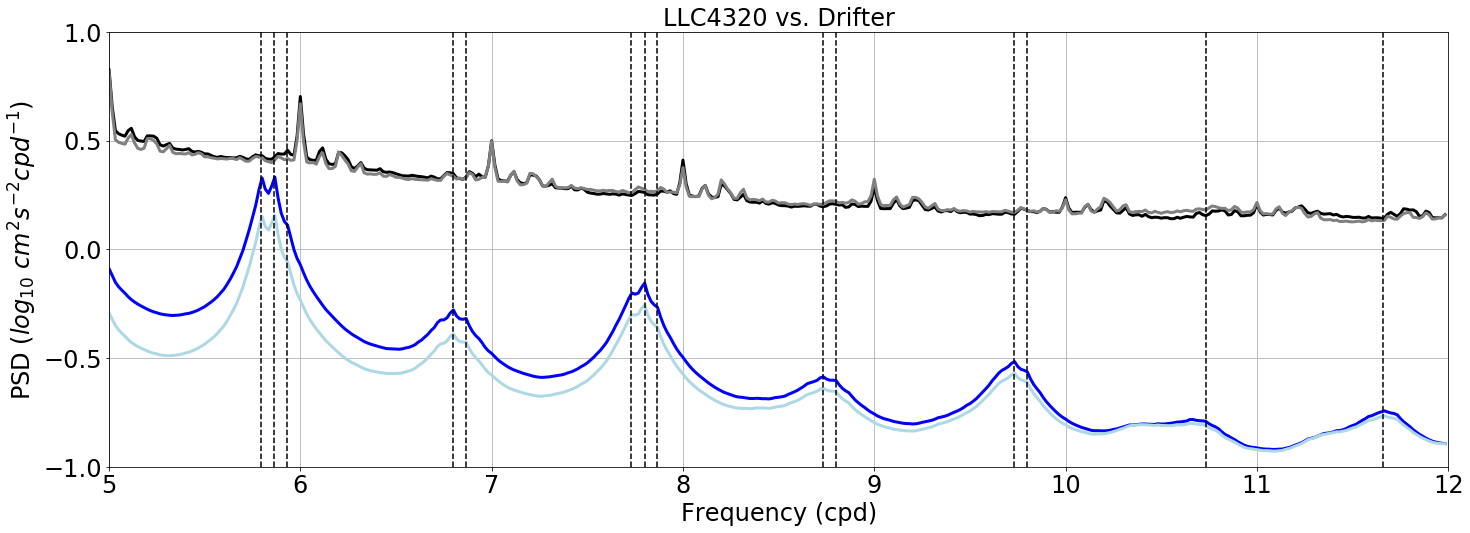

In [14]:
fig, ax = plt.subplots(figsize=(24,8))

labels = ['Anticyclonic (LLC)', 'Cyclonic (LLC)', 'Anticyclonic (Drifter)', 'Cyclonic (Drifter)']

# llc
(np.log10(E_llc_anti).where(E_llc_anti.freq_time>0)).plot(ax=ax,color='blue', label=labels[0], linewidth=3)
(np.log10(E_llc_cycl).where(E_llc_cycl.freq_time>0)).plot(ax=ax,color='lightblue', label=labels[1], linewidth=3)
# drifter
np.log10(E_drifter_anti).plot(ax=ax, linewidth=3, color='black', label=labels[2])
np.log10(E_drifter_cycl).plot(ax=ax, linewidth=3, color='grey', label=labels[3])

#ax.legend(); 
ax.grid()
ax.set_ylim([-1.,1])
ax.set_yticks([-1.,-0.5, 0., 0.5, 1.])
ax.set_xlim([5.,12.])
#ax.set_xticks([5., 6., 7., 8., 9., 10., 11., 12.])
#ax.legend(prop={'size': 24})
ax.set_ylabel('PSD ($log_{10}\ cm^2 s^{-2} cpd^{-1})$',fontsize=24)
ax.set_xlabel('Frequency (cpd)',fontsize=24)
ax.tick_params(labelsize=24)
ax.set_title('LLC4320 vs. Drifter',fontsize=24)



# 5
ax.plot([4.79956,4.79956],[-1,1e6],'k--') # 3MP5
ax.plot([4.86729,4.86729],[-1,1e6],'k--') # 2MK5
ax.plot([4.93501,4.93501],[-1,1e6],'k--') # MSK5

# 6
ax.plot([5.79682,5.79682],[-1,1e6],'k--') # M6
ax.plot([5.86455,5.86455],[-1,1e6],'k--') # 2MS6
ax.plot([5.93227,5.93227],[-1,1e6],'k--') # 2SM6

# 7
ax.plot([6.79956,6.79956],[-1,1e6],'k--') # 3MK7
ax.plot([6.86729,6.86729],[-1,1e6],'k--') # ST17

# 8
ax.plot([7.72909,7.72909],[-1,1e6],'k--') # M8
ax.plot([7.8023,7.8023],[-1,1e6],'k--')   # 3MK8
ax.plot([7.86455,7.86455],[-1,1e6],'k--') # ST23

# 9
ax.plot([8.73183,8.73183],[-1,1e6],'k--') # M4MK9
ax.plot([8.79956,8.79956],[-1,1e6],'k--') # ST27


# 10
ax.plot([9.72909,9.72909],[-1,1e6],'k--') # ST30
ax.plot([9.79682,9.79682],[-1,1e6],'k--') # ST32

# 11
ax.plot([10.7318,10.7318],[-1,1e6],'k--') # ST33


# 12
ax.plot([11.6614,11.6614],[-1,1e6],'k--') # ST34


plt.savefig('/home1/datahome/xyu/equinox_working/sandbox/Figures/Rotary_spectra_globally_averaged_comparison_5_12.png')

In [16]:
cluster.scheduler.close()

<Future finished result=None>

distributed.utils - ERROR - 
Traceback (most recent call last):
  File "/home1/datahome/xyu/.miniconda3/envs/equinox/lib/python3.6/site-packages/distributed/utils.py", line 644, in log_errors
    yield
  File "/home1/datahome/xyu/.miniconda3/envs/equinox/lib/python3.6/site-packages/distributed/client.py", line 842, in _reconnect
    yield self._ensure_connected()
  File "/home1/datahome/xyu/.miniconda3/envs/equinox/lib/python3.6/site-packages/tornado/gen.py", line 1099, in run
    value = future.result()
  File "/home1/datahome/xyu/.miniconda3/envs/equinox/lib/python3.6/site-packages/tornado/gen.py", line 1113, in run
    yielded = self.gen.send(value)
  File "/home1/datahome/xyu/.miniconda3/envs/equinox/lib/python3.6/site-packages/distributed/client.py", line 873, in _ensure_connected
    assert len(msg) == 1
AssertionError
distributed.utils - ERROR - 
Traceback (most recent call last):
  File "/home1/datahome/xyu/.miniconda3/envs/equinox/lib/python3.6/site-packages/distributed/utils.